In [ ]:
'''
【项目04】  视频网站数据清洗整理和结论研究

作业要求：
1、数据清洗 - 去除空值
要求：创建函数
提示：fillna方法填充缺失数据，注意inplace参数

2、数据清洗 - 时间标签转化
要求：
① 将时间字段改为时间标签
② 创建函数
提示：
需要将中文日期转化为非中文日期，例如 2016年5月24日 → 2016.5.24

3、问题1 分析出不同导演电影的好评率，并筛选出TOP20
要求：
① 计算统计出不同导演的好评率，不要求创建函数
② 通过多系列柱状图，做图表可视化
提示：
① 好评率 = 好评数 / 评分人数
② 可自己设定图表风格

4、问题2 统计分析2001-2016年每年评影人数总量
要求：
① 计算统计出2001-2016年每年评影人数总量，不要求创建函数
② 通过面积图，做图表可视化，分析每年人数总量变化规律
③ 验证是否有异常值（极度异常）
④ 创建函数分析出数据外限最大最小值）
⑤ 筛选查看异常值 → 是否异常值就是每年的热门电影？
提示：
① 通过箱型图验证异常值情况
② 通过quantile(q=0.5)方法，得到四分位数
③ IQR=Q3-Q1
④ 外限：最大值区间Q3+3IQR,最小值区间Q1-3IQR （IQR=Q3-Q1）
⑤ 可自己设定图表风格

'''

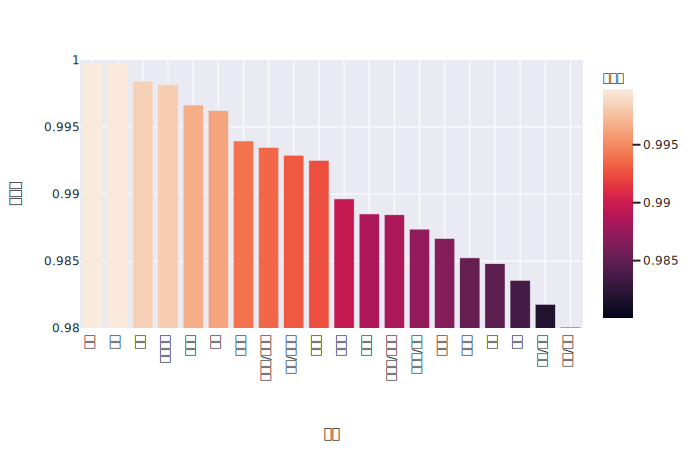

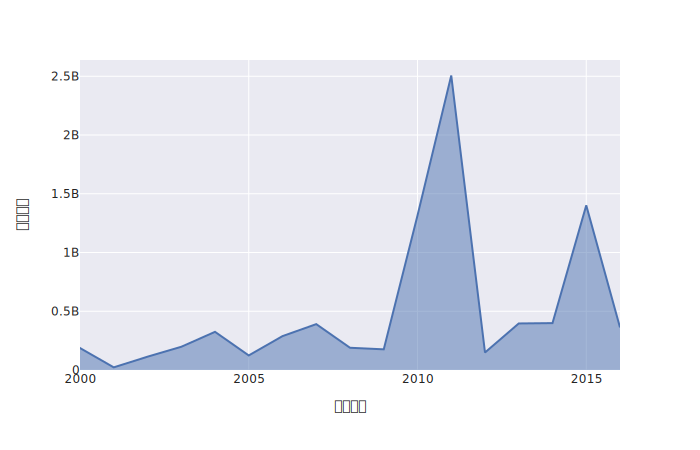

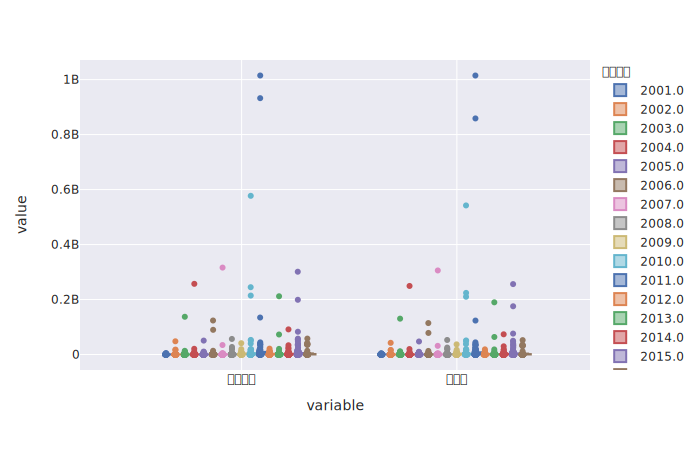

In [42]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

aqy = pd.read_csv(r'D:\BaiduNetdiskDownload\项目04视频网站数据清洗整理和结论研究\爱奇艺视频数据.csv',engine='python')

for col in aqy.columns:
    if aqy[col].dtype=='object':
        aqy[col].fillna('缺失数据',inplace=True)
    else: aqy[col].fillna(0,inplace=True)

aqy['数据获取日期']=pd.to_datetime(aqy['数据获取日期'],format='%Y年%m月%d日')

data=aqy.groupby('导演').sum()[['评分人数','好评数']]
data['好评率']=data['好评数']/data['评分人数']
data.sort_values('好评率',ascending=False,inplace=True)
data_1=data.iloc[:20].reset_index()
fig=px.bar(data_1,x='导演',y='好评率',color='好评率',template='seaborn')
fig.update_yaxes(range=[0.98,1])
# pio.orca.config.executable = r'C:\Users\徐钦华\AppData\Local\Programs\orca\orca.exe'
fig.show(renderer='svg')

data_2=aqy[['上映年份','导演','整理后剧名']].drop_duplicates()
data_3=data_2[data_2['上映年份']!=0]
data_4=aqy.groupby('整理后剧名').sum()[['评分人数','好评数']]
data_5=pd.merge(data_3,data_4,left_on='整理后剧名',right_index=True,how='left')
data_5.head()
data_6=data_5.groupby('上映年份').sum()[['评分人数','好评数']]
data_6.reset_index(inplace=True)
pig=px.area(data_6,x='上映年份',y='评分人数',template='seaborn')
pig.update_xaxes(range=[2000,2016])
pig.show(renderer='svg')


data_6 = data_5[data_5['上映年份']>2000].sort_values('上映年份')
eig = px.box(data_6,y=['评分人数','好评数'],color='上映年份',points='all',template='seaborn')
# eig.update_traces(jitter=0.3)
eig.show(renderer='svg')


In [41]:
s = data_6.describe()

q1 = s.loc['25%','评分人数']
q3 = s.loc['75%','评分人数']
iqr = q3 - q1
ma = q1 - 3*iqr
mi = q3 + 3*iqr
print(ma,mi)

data_error = data_6[(data_6['评分人数']<mi)&(data_6['评分人数']>ma)]
print(data_error)
for i in range(2000,2016):
    data_year = data_error[data_error['上映年份']==i]
    print('%i年有%i部电影'%(i,len(data_year)))
    

-2681846.0 3654456.0
         上映年份       导演       整理后剧名       评分人数        好评数
783    2001.0      周晓文       吕不韦传奇   936046.0   802166.0
1029   2001.0       英达      东北1家人3   586347.0   503292.0
52     2001.0  张多福/朱德承        爱情宝典   696847.0   629320.0
1027   2001.0       英达       东北1家人  2674339.0  2550233.0
195    2001.0       李平       格格要出嫁   797793.0   680667.0
...       ...      ...         ...        ...        ...
24286  2016.0     缺失数据     3剑豪之半面人    51993.0    48884.0
24285  2016.0     缺失数据        游击神兵     2050.0     1784.0
24284  2016.0     缺失数据  梦舟少年志之上古传奇    29323.0    23992.0
24283  2016.0     缺失数据    魔法使光之美少女   384139.0   344476.0
24296  2016.0     缺失数据       马男波杰克     1391.0     1160.0

[1762 rows x 5 columns]
2000年有0部电影
2001年有47部电影
2002年有71部电影
2003年有97部电影
2004年有107部电影
2005年有121部电影
2006年有118部电影
2007年有109部电影
2008年有128部电影
2009年有73部电影
2010年有65部电影
2011年有72部电影
2012年有71部电影
2013年有125部电影
2014年有229部电影
2015年有266部电影
